In [36]:
import pandas as pd
import matplotlib.pyplot as plt

In [37]:
df = pd.read_csv('customer_shopping_data.csv')

In [38]:
df

,Customer ID,Age,Gender,Item Purchased,Category,Purchase Amount (USD),Location,Size,Color,Season,Review Rating,Subscription Status,Payment Method,Shipping Type,Discount Applied,Promo Code Used,Previous Purchases,Preferred Payment Method,Frequency of Purchases
0,1,55,Male,Blouse,Clothing,53,Kentucky,L,Gray,Winter,3.1,Yes,Credit Card,Express,Yes,Yes,14,Venmo,Fortnightly
1,2,19,Male,Sweater,Clothing,64,Maine,L,Maroon,Winter,3.1,Yes,Bank Transfer,Express,Yes,Yes,2,Cash,Fortnightly
2,3,50,Male,Jeans,Clothing,73,Massachusetts,S,Maroon,Spring,3.1,Yes,Cash,Free Shipping,Yes,Yes,23,Credit Card,Weekly
3,4,21,Male,Sandals,Footwear,90,Rhode Island,M,Maroon,Spring,3.5,Yes,PayPal,Next Day Air,Yes,Yes,49,PayPal,Weekly
4,5,45,Male,Blouse,Clothing,49,Oregon,M,Turquoise,Spring,2.7,Yes,Cash,Free Shipping,Yes,Yes,31,PayPal,Annually
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3895,3896,40,Female,Hoodie,Clothing,28,Virginia,L,Turquoise,Summer,4.2,No,Cash,2-Day Shipping,No,No,32,Venmo,Weekly
3896,3897,52,Female,Backpack,Accessories,49,Iowa,L,White,Spring,4.5,No,PayPal,Store Pickup,No,No,41,Bank Transfer,Bi-Weekly
3897,3898,46,Female,Belt,Accessories,33,New Jersey,L,Green,Spring,2.9,No,Credit Card,Standard,No,No,24,Venmo,Quarterly
3898,3899,44,Female,Shoes,Footwear,77,Minnesota,S,Brown,Summer,3.8,No,PayPal,Express,No,No,24,Venmo,Weekly


In [39]:
df.isnull().sum()

Customer ID                 0
Age                         0
Gender                      0
Item Purchased              0
Category                    0
Purchase Amount (USD)       0
Location                    0
Size                        0
Color                       0
Season                      0
Review Rating               0
Subscription Status         0
Payment Method              0
Shipping Type               0
Discount Applied            0
Promo Code Used             0
Previous Purchases          0
Preferred Payment Method    0
Frequency of Purchases      0
dtype: int64

In [40]:
df.dtypes

Customer ID                   int64
Age                           int64
Gender                       object
Item Purchased               object
Category                     object
Purchase Amount (USD)         int64
Location                     object
Size                         object
Color                        object
Season                       object
Review Rating               float64
Subscription Status          object
Payment Method               object
Shipping Type                object
Discount Applied             object
Promo Code Used              object
Previous Purchases            int64
Preferred Payment Method     object
Frequency of Purchases       object
dtype: object

In [41]:
group_data = df.groupby(['Location','Purchase Amount (USD)','Category'])

In [42]:
aggregated_data = group_data['Age'].mean()

In [43]:
aggregated_data

Location  Purchase Amount (USD)  Category   
Alabama   20                     Clothing       59.0
          22                     Clothing       23.0
          23                     Clothing       20.0
          24                     Accessories    50.0
                                 Clothing       42.0
                                                ... 
Wyoming   94                     Clothing       54.0
          95                     Clothing       53.0
          98                     Footwear       42.0
          99                     Clothing       49.0
                                 Footwear       48.0
Name: Age, Length: 3381, dtype: float64

In [44]:
group_sales = df.groupby(['Location'])

In [45]:
region_sales = group_sales['Purchase Amount (USD)'].sum()

In [46]:
region_sales

Location
Alabama           5261
Alaska            4867
Arizona           4326
Arkansas          4828
California        5605
Colorado          4222
Connecticut       4226
Delaware          4758
Florida           3798
Georgia           4645
Hawaii            3752
Idaho             5587
Illinois          5617
Indiana           4655
Iowa              4201
Kansas            3437
Kentucky          4402
Louisiana         4848
Maine             4388
Maryland          4795
Massachusetts     4384
Michigan          4533
Minnesota         4977
Mississippi       4883
Missouri          4691
Montana           5784
Nebraska          5172
Nevada            5514
New Hampshire     4219
New Jersey        3802
New Mexico        5014
New York          5257
North Carolina    4742
North Dakota      5220
Ohio              4649
Oklahoma          4376
Oregon            4243
Pennsylvania      4926
Rhode Island      3871
South Carolina    4439
South Dakota      4236
Tennessee         4772
Texas             4712
Ut

In [49]:
location_totals = df.groupby('Location')['Purchase Amount (USD)'].sum().reset_index()


<BarContainer object of 50 artists>

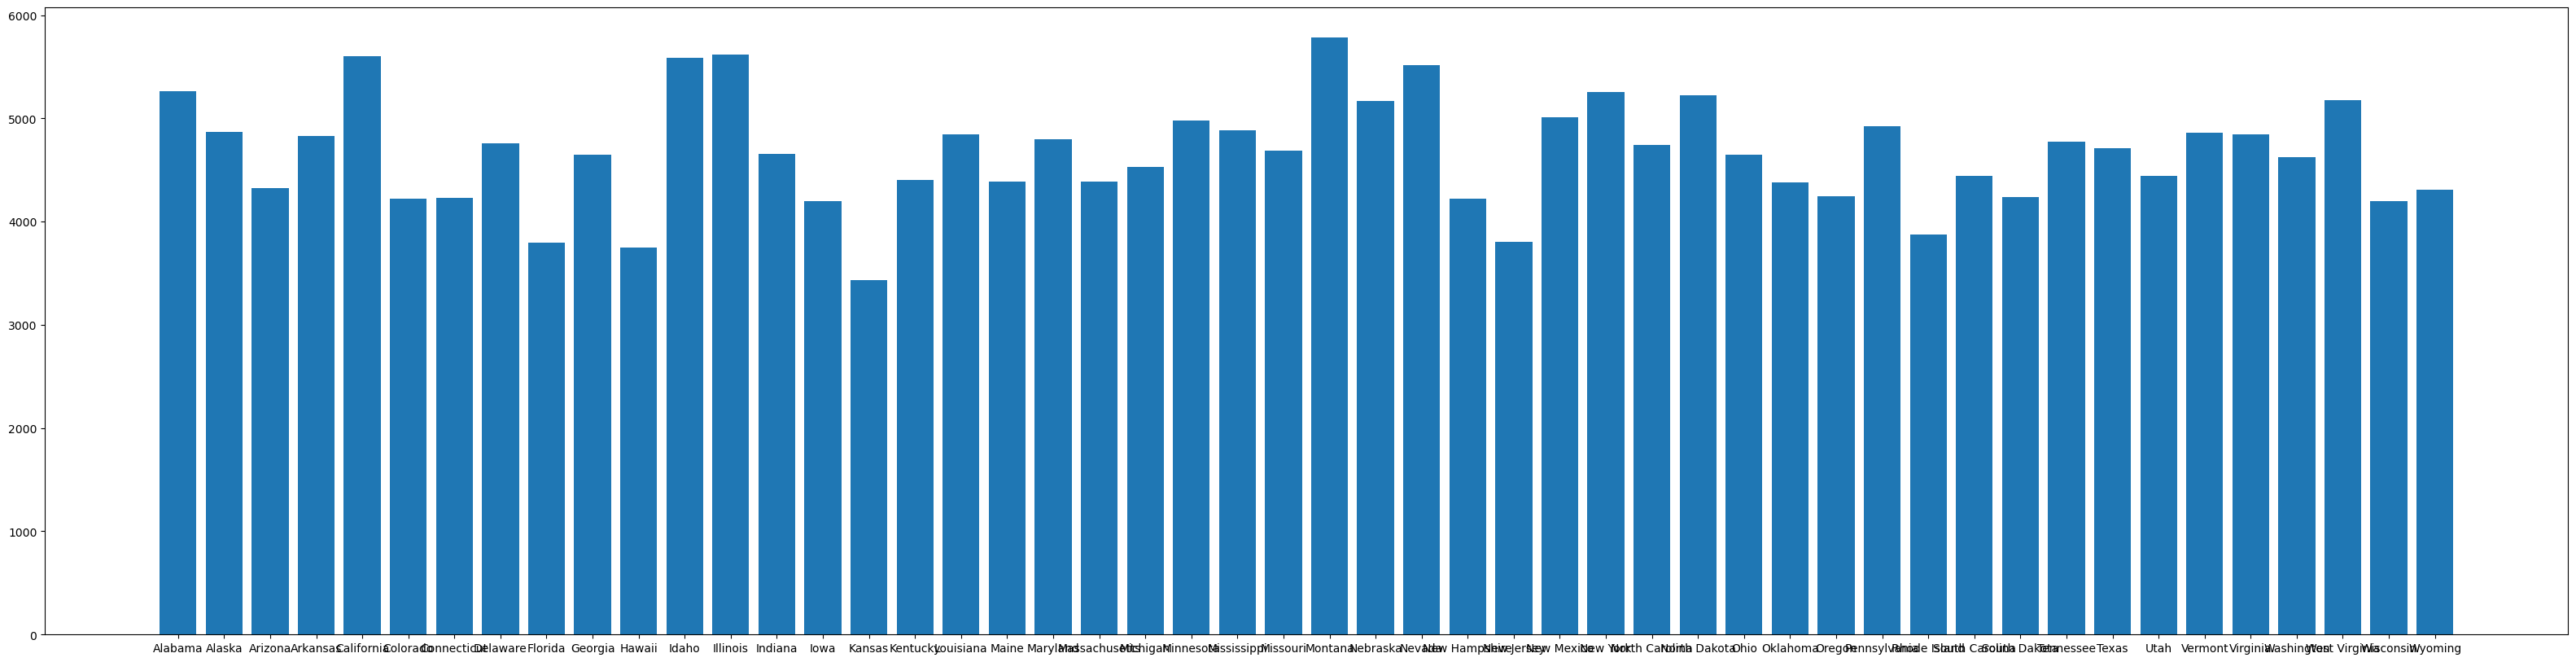

In [50]:
plt.figure(figsize=(40,10))
plt.bar(location_totals['Location'], location_totals['Purchase Amount (USD)'])

In [22]:
selected_locations = ['Alabama','Alaska']

In [23]:
subset_location = location_totals[df['Location'].isin(selected_locations)]

<BarContainer object of 161 artists>

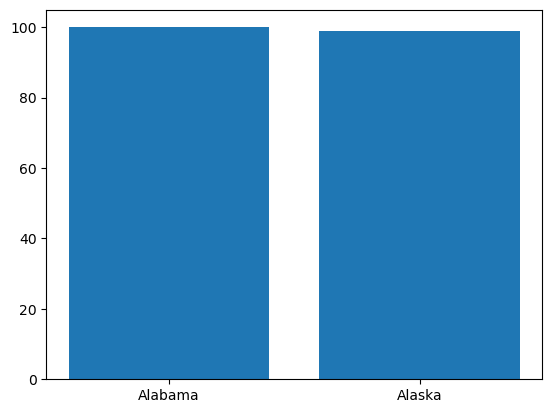

In [25]:
plt.bar(subset_location['Location'], subset_location['Purchase Amount (USD)'])

([<matplotlib.patches.Wedge at 0x23507a30810>,
 [Text(1.097235584553359, 0.0779363329253367, 'Alabama'),
  Text(1.0764217337243374, 0.22653090554247118, 'Alaska'),
  Text(1.0401717306874352, 0.35783064524814845, 'Arizona'),
  Text(0.9882262251602546, 0.48312413301915913, 'Arkansas'),
  Text(0.9107574696677369, 0.6168637057279521, 'California'),
  Text(0.8213128364622332, 0.7317412279367354, 'Colorado'),
  Text(0.7328531095872162, 0.8203208639114016, 'Connecticut'),
  Text(0.6283956278025957, 0.9028393738415388, 'Delaware'),
  Text(0.5203346557544921, 0.9691500637263841, 'Florida'),
  Text(0.406918291063435, 1.021967467387301, 'Georgia'),
  Text(0.28889602949858534, 1.0613854550256248, 'Hawaii'),
  Text(0.15335975173643276, 1.0892569882940113, 'Idaho'),
  Text(-0.012253751102730604, 1.0999317458751303, 'Illinois'),
  Text(-0.16393775038448538, 1.0877152265178944, 'Indiana'),
  Text(-0.2922993291546662, 1.0604532531779665, 'Iowa'),
  Text(-0.3997317194925551, 1.0247997621152756, 'Kansas'

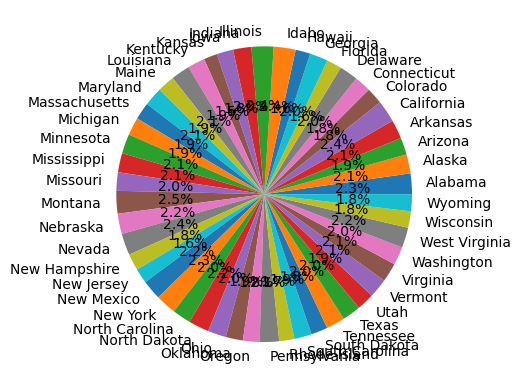

In [56]:
plt.pie(location_totals['Purchase Amount (USD)'],labels=location_totals['Location'],autopct='%1.1f%%')

In [62]:
location_totals_sorted_desc = location_totals.sort_values(by='Purchase Amount (USD)', ascending=False)
print(location_totals_sorted_desc)

          Location  Purchase Amount (USD)
25         Montana                   5784
12        Illinois                   5617
4       California                   5605
11           Idaho                   5587
27          Nevada                   5514
0          Alabama                   5261
31        New York                   5257
33    North Dakota                   5220
47   West Virginia                   5174
26        Nebraska                   5172
30      New Mexico                   5014
22       Minnesota                   4977
37    Pennsylvania                   4926
23     Mississippi                   4883
1           Alaska                   4867
44         Vermont                   4860
17       Louisiana                   4848
45        Virginia                   4842
3         Arkansas                   4828
19        Maryland                   4795
41       Tennessee                   4772
7         Delaware                   4758
32  North Carolina                

In [63]:
grouping  = df.groupby(['Location','Category'])

In [64]:
grouping_sales = grouping['Purchase Amount (USD)'].sum()

In [66]:
grouping_sales

Location   Category   
Alabama    Accessories    1576
           Clothing       2334
           Footwear        914
           Outerwear       437
Alaska     Accessories    1719
                          ... 
Wisconsin  Outerwear       120
Wyoming    Accessories    1388
           Clothing       1850
           Footwear        703
           Outerwear       368
Name: Purchase Amount (USD), Length: 200, dtype: int64

Text(0, 0.5, 'Total Sales Amount (USD)')

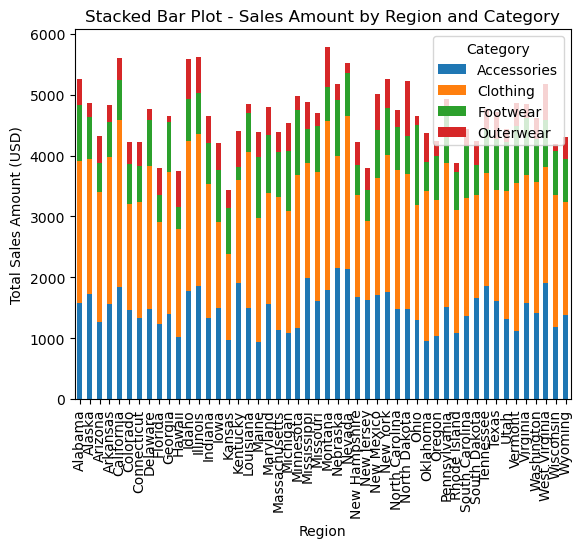

In [73]:
stacked_df = df.pivot_table(index='Location', columns='Category', values='Purchase Amount (USD)', aggfunc='sum')
stacked_df.plot(kind='bar', stacked=True)
plt.title('Stacked Bar Plot - Sales Amount by Region and Category')
plt.xlabel('Region')
plt.ylabel('Total Sales Amount (USD)')

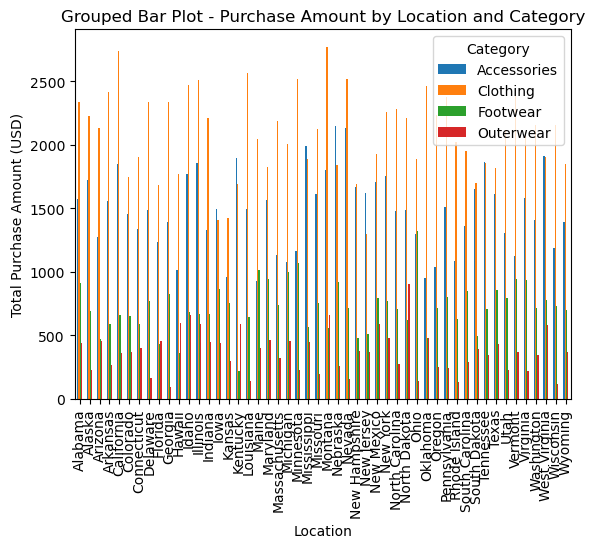

In [74]:
# Grouped Bar Plot
grouped_df = df.pivot_table(index='Location', columns='Category', values='Purchase Amount (USD)', aggfunc='sum')
grouped_df.plot(kind='bar')
plt.title('Grouped Bar Plot - Purchase Amount by Location and Category')
plt.xlabel('Location')
plt.ylabel('Total Purchase Amount (USD)')

plt.show()